## Question 1

Number of steps is 73


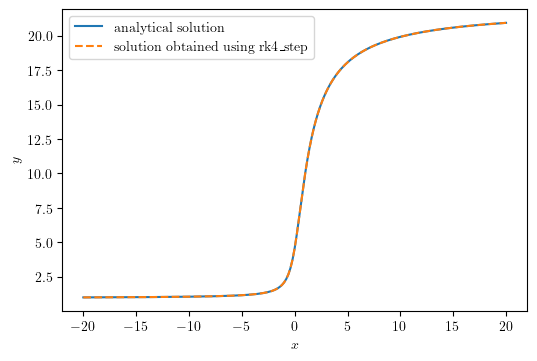

In [32]:
# RK4 stepper
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 100

# solving dy/dx = y/(1+x**2) using RK4

# ODE to solve
def my_fun(x,y):
    dydx=y/(1+x**2)
    return dydx

# analytical solution
def truth(x):
    return (np.exp(np.arctan(x)))/(np.exp(np.arctan(-20)))

# Runge Kutta 4th order stepper
def rk4_step(fun,x,y,h):
    k1=fun(x,y)
    k2=fun(x+h/2,y+h*k1/2)
    k3=fun(x+h/2,y+h*k2/2)
    k4=fun(x+h,y+h*k3)
    return x+h,y+h*(k1+2*k2+2*k3+k4)/6

# advancing the solution using rk4_step
x=[-20]
xf=20
y=[1]
n=200
h=(xf-x[0])/n

for i in range(n):
    xn,yn=rk4_step(my_fun,x[-1],y[-1],h)
    x.append(xn)
    y.append(yn)

# error
err_step = np.abs(y-truth(x))
rmse_step = np.sqrt(np.mean(err_step**2))
print('Number of steps is', steps)
plt.plot(x, truth(x), label = 'analytical solution')
plt.plot(x,y, '--', label = 'solution obtained using rk4_step')
plt.legend(loc = 'upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Now let's do two steps of $h/2$ and one step of $h$ and compare them to cancel out the leading order error term (which is $h^5$). The two numerical approximations are related by:
\begin{align*}
f(x+(h)) &=y =  y_1 + (h)^5 + O(h^6)\\
f(x+2(h/2)) &=y =  y_2 +2(h/2)^5 + O(h^6).
\end{align*}
The first equation is the error for the big step of $2h$ and the second equation is the error for two small stepts of $h$. If we drop the $O(h^6)$, we can try to solve for a combination of $y_1$ and $y_2$ that will cancel the leading order error in $h^5$.

We have,
\begin{equation*}
y_2 -\frac{y_1}{16} =y-\frac{h^5}{16}-(\frac{y}{16}-\frac{h^5}{16}) = \frac{15y}{16}.
\end{equation*}
Now rearanging to find $y$ in terms of $y_1$ and $y_2$ we have that
\begin{equation}
y = \frac{16y_2-y_1}{15}.
\end{equation}
We can use Equation (1) to get a better numerical integration of our ODEs using RK4.

The normal RK4 stepper uses 4 function evaluations per step, so 800 evaluations for 200 steps. This new adaptive stepper takes 4 functions evaluations for the 3 calls, every step, but they all share the same starting point, so 11 evaluations per step. For fairness, we want to use the same amount of function evaluations to compare both methods, so with the adaptive method we need 73 steps to reach 800 function evaluations.

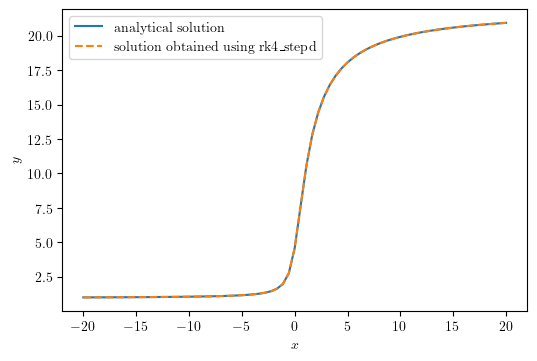

In [33]:
# adaptive RK4 stepper
def rk4_stepd(fun,x,y,h):
    k1 = fun(x,y)
    k2 = fun(x + h/2, y + h*k1/2)
    k3 = fun(x + h/2, y + h*k2/2)
    k4 = fun(x + h, y + h * k3)
    
    xn = x + h
    yn = y + h * (k1 + 2*k2 + 2*k3 + k4)/6

    # half step left side
    k1hl = k1 
    k2hl = fun(x + h/4, y + h/4 * k1hl)
    k3hl = fun(x + h/4, y + h/4 * k2hl)
    k4hl = fun(x + h/2, y + h/2 * k3hl)

    xnhl = x + h/2
    ynhl = y + h/2 * (k1hl + 2*k2hl + 2*k3hl + k4hl)/6

    # half step on right side
    xnhr,ynhr=rk4_step(fun,xnhl,ynhl,h/2)
    return xn, ynhr + (ynhr - yn)/15

xd=[-20]
yd=[1]
xf=20
n=int(np.floor(200*4/11))
h=(xf-x[0])/n

for i in range(n):
    xn,yn=rk4_stepd(my_fun,xd[-1],yd[-1],h)
    xd.append(xn)
    yd.append(yn)

plt.plot(xd, truth(xd), label = 'analytical solution')
plt.plot(xd,yd, '--', label = 'solution obtained using rk4_stepd')
plt.legend(loc = 'upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

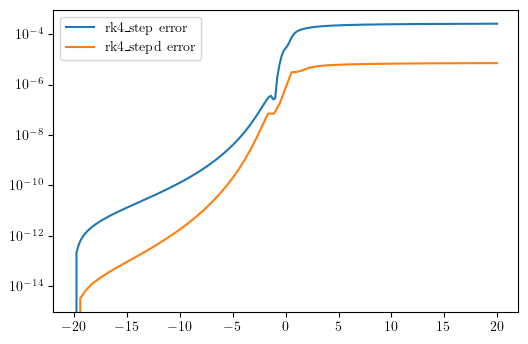

In [35]:
# comparing error
error=np.abs(y-truth(x))
errord=np.abs(yd-truth(xd))
plt.semilogy(x,error,label='rk4_step error')
plt.semilogy(xd,errord,label='rk4_stepd error')
plt.legend()
plt.show()
